In [1]:
import os

os.mkdir('향수')

In [2]:
path = os.getcwd()

print(path)


/content


In [3]:
os.chdir(f"{path}" + "/향수")

path2 = os.getcwd()
print(path2)

/content/향수


In [4]:
# 향수 압축파일을 향수 폴더에 넣은 뒤 압축을 해제합니다.

!unzip 향수_이미지.zip
!rm 향수_이미지.zip

Archive:  향수_이미지.zip
   creating: 딥디크_도손/
  inflating: 딥디크_도손/딥디크_도손_1.jpg  
  inflating: 딥디크_도손/딥디크_도손_10.jpg  
  inflating: 딥디크_도손/딥디크_도손_104.jpg  
  inflating: 딥디크_도손/딥디크_도손_105.jpg  
  inflating: 딥디크_도손/딥디크_도손_106.jpg  
  inflating: 딥디크_도손/딥디크_도손_107.jpg  
  inflating: 딥디크_도손/딥디크_도손_11.jpg  
  inflating: 딥디크_도손/딥디크_도손_110.jpg  
  inflating: 딥디크_도손/딥디크_도손_111.jpg  
  inflating: 딥디크_도손/딥디크_도손_113.jpg  
  inflating: 딥디크_도손/딥디크_도손_114.jpg  
  inflating: 딥디크_도손/딥디크_도손_115.jpg  
  inflating: 딥디크_도손/딥디크_도손_116.jpg  
  inflating: 딥디크_도손/딥디크_도손_117.jpg  
  inflating: 딥디크_도손/딥디크_도손_118.jpg  
  inflating: 딥디크_도손/딥디크_도손_119.jpg  
  inflating: 딥디크_도손/딥디크_도손_12.jpg  
  inflating: 딥디크_도손/딥디크_도손_120.jpg  
  inflating: 딥디크_도손/딥디크_도손_121.jpg  
  inflating: 딥디크_도손/딥디크_도손_123.jpg  
  inflating: 딥디크_도손/딥디크_도손_125.jpg  
  inflating: 딥디크_도손/딥디크_도손_127.jpg  
  inflating: 딥디크_도손/딥디크_도손_128.jpg  
  inflating: 딥디크_도손/딥디크_도손_129.jpg  
  inflating: 딥디크_도손/딥디크_도손_13.jpg  
  inflating: 딥디크_도손/딥디크_도손_130.jpg  
  

In [5]:
folder_name = os.listdir(path2)
print(path2)

/content/향수


In [6]:
print(folder_name)

['마르지엘라_커피브레이크', '에르메스_운 자르뎅수르닐', '이솝_테싯', '딥디크_도손', '아쿠아디파르마_미르토', '톰포드_화이트 스웨이드', '존바바토스_아티산', '르라보_상탈', '바이레도_집시워터', '샤넬_블루드']


In [7]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

#향수 이미지들을 image_datas 에 모두 넣습니다.

image_datas = glob(f'{os.getcwd()}/*/*.jpg')
class_name = folder_name

In [8]:
print(image_datas)

print(len(image_datas)) #총 이미지 개수

['/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_214.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_222.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_183.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_12.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_52.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_243.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_263.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_47.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_88.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_71.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_17.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_255.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_20.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_107.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_181.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_50.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_231.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_83.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_103.jpg', '/content/향수/마르지엘라_커피브레이크/마르지엘라_커피브레이크_127.jpg', '/content/향수/마르지엘라_커피브레이크/마르

In [9]:
#향수 이미지 파일을 열어서 변환합니다.

X = []
Y = []
for imagename in image_datas:
    image = Image.open(imagename).convert('RGB')
    image = image.resize((224, 224))
    image = np.array(image)
    X.append(image)
    label = imagename.split('/')[3]
    Y.append(label)

1239
마르지엘라_커피브레이크


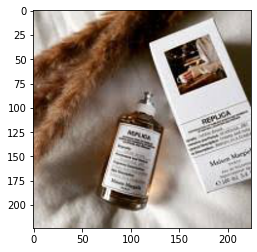

In [10]:
#첫번째 향수 보기

plt.imshow(X[0])
print(len(X))
print(Y[0])

In [11]:
X = np.array(X)
Y = np.array(Y)

train_images = X.astype('float32') / 255 #일반화

print(X.shape)
print(Y.shape)

(1239, 224, 224, 3)
(1239,)


In [58]:
from keras import models
from keras import layers

base_model = keras.applications.Xception(
    weights="imagenet", # ImageNet에 대해서 훈련된 모델을 가져옵니다.
    input_shape=(224, 224, 3),
    include_top=False,  # 개와 고양이를 예측할 것이기 때문에 ImageNet 데이터를 예측하는 층을 포함하지 않습니다.
)  
# Xception은 훈련이 불가능하도록 설정합니다.
base_model.trainable = False

model = models.Sequential()

#TODO: 입력층 추가
model.add(layers.Input(shape=(224,224,3)))

#가져온 모델 추가
model.add(base_model)

# MLP는 일차원으로 펼쳐진 입력이 필요합니다. 
# 아래 둘 중 원하는 것 하나만 쓰세요.
# Xception은 5 x 5 사이즈의 2048개 채널을 출력합니다.
#model.add(layers.Flatten()) # 각 채널의 모든 픽셀들을 일차원으로 이어붙이는 무식하고 낡은 방법 (25개 x 2048장)
#model.add(layers.GlobalAveragePooling2D()) # 각 5 x 5 채널을 하나의 값으로 요약한 후 일차원으로 이어붙이는 방법 (2048개)

# 출력층 추가 (0~1 출력하는 노드 하나만 필요하고 적절한 활성화 함수 기재)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(len(folder_name),activation="softmax"))
# 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
#라벨을 숫자로 변환

train_labels = [0]

count = 0
for i in range(1, len(Y)):
  if Y[i] == Y[i-1]:
    train_labels.append(count)
  else:
    count += 1
    train_labels.append(count)
  
for i in range(len(folder_name)):
  print(train_labels.count(i), end = " ")
print()

print(len(train_labels))
print(train_labels)

108 133 132 189 161 97 106 99 115 99 
1239
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [15]:
#ont-hot 인코딩

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
print(train_labels)
print(len(train_labels))

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
1239


In [16]:
#(선택1) 테스트 데이터 나누기
# 테스트 데이터셋을 20% 햘당함

X_train, X_test, y_train, y_test = train_test_split(X, train_labels, test_size=0.2, shuffle=True, stratify=train_labels, random_state=34)

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [17]:
print(len(X_train))

991


In [59]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

datagen = ImageDataGenerator(   
    rotation_range=30,
    zoom_range = 0.3,
    horizontal_flip=False,
    vertical_flip=False)

train_gen = datagen.flow(X_train, y_train, batch_size=16)

model.fit(train_gen, epochs=200, callbacks=EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True), validation_data=(X_test, y_test))

Epoch 1/200
62/62 [==============================] - 17s 222ms/step - loss: 1.2597 - accuracy: 0.6690 - val_loss: 0.6775 - val_accuracy: 0.8871
Epoch 2/200
62/62 [==============================] - 12s 194ms/step - loss: 0.5189 - accuracy: 0.8971 - val_loss: 0.4186 - val_accuracy: 0.9274
Epoch 3/200
62/62 [==============================] - 12s 196ms/step - loss: 0.3543 - accuracy: 0.9374 - val_loss: 0.3412 - val_accuracy: 0.9395
Epoch 4/200
62/62 [==============================] - 12s 197ms/step - loss: 0.2950 - accuracy: 0.9445 - val_loss: 0.3040 - val_accuracy: 0.9355
Epoch 5/200
62/62 [==============================] - 12s 197ms/step - loss: 0.2617 - accuracy: 0.9384 - val_loss: 0.2868 - val_accuracy: 0.9476
Epoch 6/200
62/62 [==============================] - 12s 194ms/step - loss: 0.2000 - accuracy: 0.9647 - val_loss: 0.2743 - val_accuracy: 0.9315
Epoch 7/200
62/62 [==============================] - 12s 194ms/step - loss: 0.1752 - accuracy: 0.9687 - val_loss: 0.2540 - val_accuracy:

In [60]:
#테스트 데이터 측정

model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 126ms/step - loss: 0.2177 - accuracy: 0.9556


[0.21772418916225433, 0.9556451439857483]

In [61]:
#테스트 이미지를 넣기 위해 기존 폴더로 이동

os.chdir('/content')

(1, 224, 224, 3)


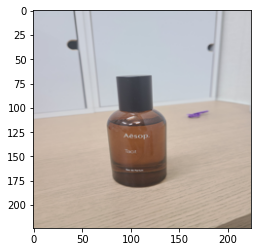

In [81]:
#테스트 이미지 넣기

test1 = Image.open('/content/테스트4.jpg').convert('RGB')
test1 = test1.transpose(Image.ROTATE_270)
test1 = test1.resize((224, 224))
plt.imshow(test1)
test1 = np.array(test1)
test1 = test1.reshape(1,224,224,3)
test1 = test1.astype(float) / 255

print(test1.shape)


In [82]:
#모델 돌리기

ans1 = model.predict(test1)
print(folder_name)

print(model.predict(test1))

['마르지엘라_커피브레이크', '에르메스_운 자르뎅수르닐', '이솝_테싯', '딥디크_도손', '아쿠아디파르마_미르토', '톰포드_화이트 스웨이드', '존바바토스_아티산', '르라보_상탈', '바이레도_집시워터', '샤넬_블루드']
[[8.6734990e-06 1.2340384e-05 9.9625897e-01 7.7812721e-05 6.0791132e-04
  1.6863679e-04 4.0646853e-05 3.7283151e-04 1.1717307e-03 1.2805498e-03]]


In [83]:
#정확도 상위 3개와 정확도 출력

ans1 = model.predict(test1)
print(folder_name)

print(model.predict(test1))
preds = model.predict(test1)
p = np.argsort(preds, axis=1)
print(np.flip(p))
p1 = np.flip((p))
print(type(p))

for i in range(3):
  print(folder_name[int(p1[0][i])])

['마르지엘라_커피브레이크', '에르메스_운 자르뎅수르닐', '이솝_테싯', '딥디크_도손', '아쿠아디파르마_미르토', '톰포드_화이트 스웨이드', '존바바토스_아티산', '르라보_상탈', '바이레도_집시워터', '샤넬_블루드']
[[8.6734990e-06 1.2340384e-05 9.9625897e-01 7.7812721e-05 6.0791132e-04
  1.6863679e-04 4.0646853e-05 3.7283151e-04 1.1717307e-03 1.2805498e-03]]
[[2 9 8 4 7 5 3 6 1 0]]
<class 'numpy.ndarray'>
이솝_테싯
샤넬_블루드
바이레도_집시워터


In [76]:
model.save("test_model2")

INFO:tensorflow:Assets written to: test_model2/assets
